# Analisis de Datos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
formatter = EngFormatter(places=0, sep=u"\N{THIN SPACE}")  # U+2009


## Cargar Datos

In [2]:
import datetime
import pandas as pd

def leer_data():
    outfile='./data/consulta.csv'
    data = pd.read_csv(outfile)
    return data

data = leer_data()
print('Done')

Done


In [3]:
data.head()

,client_id,date,año,mes,dia,hora,merchant_departement,merchant_province,merchant_district,mcc,mccg,client_age,quantity,amount_sol
0,+++g8j9k+5A=,2016-07-07 01:08:05,2016,7,7,1,LIMA,LIMA,San Juan De Luriganc,5655,8,32.0,1,45.0
1,++/oQ9Lb9dI=,2017-05-29 21:05:40,2017,5,29,21,LIMA,LIMA,San Juan De Luriganc,4812,25,49.0,1,104.0
2,++14g8obpj0=,2016-09-08 21:15:55,2016,9,8,21,LIMA,LIMA,San Juan De Luriganc,5912,15,NaN,1,9.0
3,++14g8obpj0=,2016-08-30 00:01:08,2016,8,30,0,LIMA,LIMA,San Juan De Luriganc,5661,18,NaN,1,59.0
4,++14g8obpj0=,2016-08-30 00:56:40,2016,8,30,0,LIMA,LIMA,San Juan De Luriganc,5661,18,NaN,1,134.0


In [4]:
temp = data

In [5]:
temp['date'] = pd.to_datetime(temp['date'])
temp['dia_semana'] = temp['date'].dt.dayofweek
days = {0:'Mon',1:'Tues',2:'Weds',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
temp['dia_semana'] = temp['dia_semana'].apply(lambda x: days[x])

In [6]:
days = {0:'1-Madrugada',1:'1-Madrugada',2:'1-Madrugada',3:'1-Madrugada',4:'1-Madrugada',5:'1-Madrugada',
        6:'2-Mañana',7:'2-Mañana',8:'2-Mañana',9:'2-Mañana',10:'2-Mañana',11:'2-Mañana',
        12:'3-Tarde',13:'3-Tarde',14:'3-Tarde',15:'3-Tarde',16:'3-Tarde',17:'3-Tarde',
        18:'4-Noche',19:'4-Noche',20:'4-Noche',21:'4-Noche',22:'4-Noche',23:'4-Noche'}
temp['turno'] = temp['hora'].apply(lambda x: days[x])

In [7]:
data =  temp
data.head(3)

,client_id,date,año,mes,dia,hora,merchant_departement,merchant_province,merchant_district,mcc,mccg,client_age,quantity,amount_sol,dia_semana,turno
0,+++g8j9k+5A=,2016-07-07 01:08:05,2016,7,7,1,LIMA,LIMA,San Juan De Luriganc,5655,8,32.0,1,45.0,Thurs,1-Madrugada
1,++/oQ9Lb9dI=,2017-05-29 21:05:40,2017,5,29,21,LIMA,LIMA,San Juan De Luriganc,4812,25,49.0,1,104.0,Mon,4-Noche
2,++14g8obpj0=,2016-09-08 21:15:55,2016,9,8,21,LIMA,LIMA,San Juan De Luriganc,5912,15,NaN,1,9.0,Thurs,4-Noche


In [8]:
y = list(data.groupby(['merchant_district']).sum()['amount_sol'])
x = list(data.groupby(['merchant_district']).sum()['amount_sol'] .index)
x[y.index(min(y))]

'San Juan De Luriganc'

0 :   708962       San Juan De Luriganc


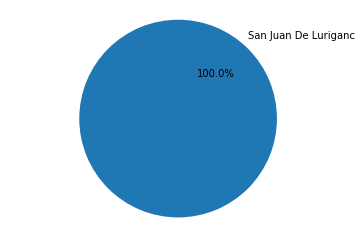

In [9]:
y = list(data.groupby(['merchant_district']).count()['amount_sol'])
x = list(data.groupby(['merchant_district']).count()['amount_sol'] .index)
plt.pie(y, labels=x, autopct='%1.1f%%', shadow=False, startangle=230)
plt.axis('equal') 
for i in range(len(y)):
    print(i,':  ',y[i],'     ',x[i])

In [10]:
"""
distrito = input( "Ingrese distrito: ")
data = data.loc[data['merchant_district']==distrito]
"""

'\ndistrito = input( "Ingrese distrito: ")\ndata = data.loc[data[\'merchant_district\']==distrito]\n'

0 :   25       1520
1 :   18       1740
2 :   41       1750
3 :   96       1799
4 :   3       4722
5 :   5440       4812
6 :   36       4814
7 :   3       4816
8 :   6259       4900
9 :   34       5045
10 :   20       5046
11 :   30       5047
12 :   6455       5211
13 :   502       5231
14 :   458       5251
15 :   2924       5300
16 :   55351       5311
17 :   13       5331
18 :   3587       5399
19 :   48197       5411
20 :   39       5422
21 :   141       5441
22 :   272       5451
23 :   2310       5462
24 :   160       5499
25 :   117       5511
26 :   220       5532
27 :   10894       5533
28 :   75687       5541
29 :   234       5571
30 :   1907       5611
31 :   2112       5621
32 :   3200       5631
33 :   341       5641
34 :   4109       5651
35 :   2811       5655
36 :   10198       5661
37 :   1       5681
38 :   419       5691
39 :   27       5697
40 :   5       5699
41 :   813       5712
42 :   5       5713
43 :   6       5714
44 :   565       5722
45 :   485       5732


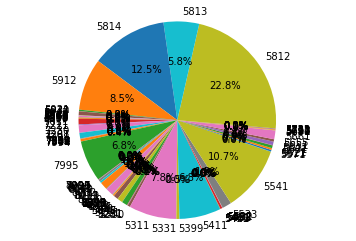

In [11]:
y = list(data.groupby(['mcc']).count()['amount_sol'])
x = list(data.groupby(['mcc']).count()['amount_sol'] .index)
plt.pie(y, labels=x, autopct='%1.1f%%', shadow=False, startangle=230)
plt.axis('equal') 
for i in range(len(y)):
    print(i,':  ',y[i],'     ',x[i])

In [12]:
data.head(3)

,client_id,date,año,mes,dia,hora,merchant_departement,merchant_province,merchant_district,mcc,mccg,client_age,quantity,amount_sol,dia_semana,turno
0,+++g8j9k+5A=,2016-07-07 01:08:05,2016,7,7,1,LIMA,LIMA,San Juan De Luriganc,5655,8,32.0,1,45.0,Thurs,1-Madrugada
1,++/oQ9Lb9dI=,2017-05-29 21:05:40,2017,5,29,21,LIMA,LIMA,San Juan De Luriganc,4812,25,49.0,1,104.0,Mon,4-Noche
2,++14g8obpj0=,2016-09-08 21:15:55,2016,9,8,21,LIMA,LIMA,San Juan De Luriganc,5912,15,NaN,1,9.0,Thurs,4-Noche


## Graficos

### Comportamiento de Gastos totales por meses

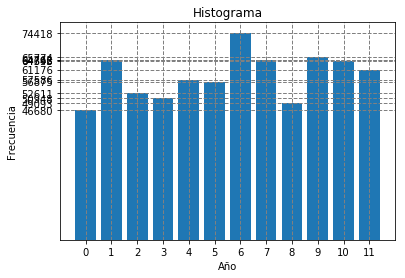

,año,mes,client_id
0,2016,6,46680
1,2016,7,64762
2,2016,8,52611
3,2016,9,50948
4,2016,10,57586
5,2016,11,56875
6,2016,12,74418
7,2017,1,64646
8,2017,2,49093
9,2017,3,65774


In [13]:
# Grafico por Meses - Cantidad

nn= data.groupby(['año','mes'], as_index=False, sort=True)['client_id'].count()

fig, ax = plt.subplots()
ax.bar(nn.index, nn['client_id'], align='center')
ax.grid(color='gray', linestyle='--', linewidth=1)

ax.set_xlabel('Año')
ax.set_xticks(nn.index)

ax.set_ylabel('Frecuencia')
ax.set_yticks(nn['client_id'])
ax.set_title('Histograma')
plt.show()
nn

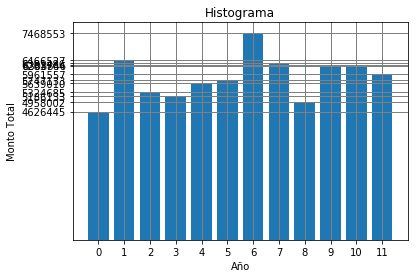

,año,mes,amount_sol
0,2016,6,4626445.0
1,2016,7,6466527.0
2,2016,8,5324685.0
3,2016,9,5186133.0
4,2016,10,5639010.0
5,2016,11,5747133.0
6,2016,12,7468553.0
7,2017,1,6381486.0
8,2017,2,4958002.0
9,2017,3,6308846.0


In [14]:
# Grafico por Meses - Montos 

nn= data.groupby(['año','mes'], as_index=False, sort=True)['amount_sol'].sum()

fig, ax = plt.subplots()
ax.bar(nn.index, nn['amount_sol'], align='center')
ax.grid(color='gray', linestyle='-', linewidth=1)

ax.set_xlabel('Año')
ax.set_xticks(nn.index)

ax.set_ylabel('Monto Total')
ax.set_yticks(nn['amount_sol'])
ax.set_title('Histograma')
plt.show()
nn

In [15]:
data.head(3)

,client_id,date,año,mes,dia,hora,merchant_departement,merchant_province,merchant_district,mcc,mccg,client_age,quantity,amount_sol,dia_semana,turno
0,+++g8j9k+5A=,2016-07-07 01:08:05,2016,7,7,1,LIMA,LIMA,San Juan De Luriganc,5655,8,32.0,1,45.0,Thurs,1-Madrugada
1,++/oQ9Lb9dI=,2017-05-29 21:05:40,2017,5,29,21,LIMA,LIMA,San Juan De Luriganc,4812,25,49.0,1,104.0,Mon,4-Noche
2,++14g8obpj0=,2016-09-08 21:15:55,2016,9,8,21,LIMA,LIMA,San Juan De Luriganc,5912,15,NaN,1,9.0,Thurs,4-Noche


### Distribucion de Soles

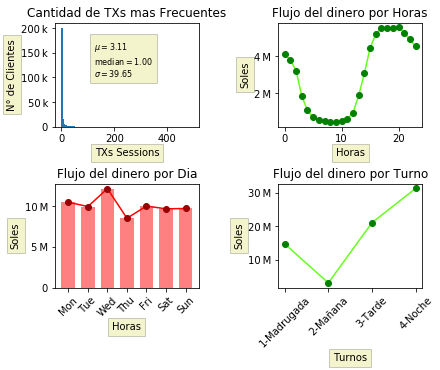

In [16]:
box = dict(facecolor='#cccc00', pad=4, alpha=0.2)
fig, axes = plt.subplots(2, 2)
ax1, ax2, ax3, ax4 = axes.flatten()
plt.subplots_adjust(top=1, bottom=0.08, left=0.10, right=0.95, hspace=0.55, wspace=0.55)


ax1.xaxis.set_major_formatter(formatter)
ax1.yaxis.set_major_formatter(formatter)
y = data.groupby(['client_id']).count()      # Us por cliente
y = y["mcc"].tolist()
mu = np.mean(y)
median = np.median(y)
sigma = np.var(y)
text = '$\mu=%.2f$\n$\mathrm{median}=%.2f$\n$\sigma=%.2f$' % (mu, median, sigma)
ax1.hist(y,100)   #ax1.hist(y,100)
ax1.set_title('Cantidad de TXs mas Frecuentes')
ax1.set_xlabel('TXs Sessions', bbox=box)
ax1.set_ylabel('N° de Clientes', bbox=box)
ax1.text(0.27, 0.85, text, transform=ax1.transAxes, fontsize=8, verticalalignment='top', bbox=box)


ax2.xaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)
y = list(data.groupby(['hora']).sum()['amount_sol'])
x = range(len(y))
ax2.plot(x,y,'-',color='#66ff1a')
ax2.plot(x,y,'ob',color='green')
ax2.set_title('Flujo del dinero por Horas')
ax2.set_xlabel('Horas', bbox=box)
ax2.set_ylabel('Soles', bbox=box)


y = data.groupby(['dia_semana']).sum()['amount_sol']
x = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
ax3.yaxis.set_major_formatter(formatter)
ax3.set_xticklabels(x, rotation=45)
ax3.bar(x,y,0.7,color='#ff8080')
ax3.plot(x,y,'-',color='#ff0000')
ax3.plot(x,y,'ob',color='#990000')
ax3.set_title('Flujo del dinero por Dia')
ax3.set_xlabel('Horas', bbox=box)
ax3.set_ylabel('Soles', bbox=box)


y = list(data.groupby(['turno']).sum()['amount_sol'])
x = list(data.groupby(['turno']).sum()['amount_sol'] .index)
ax4.yaxis.set_major_formatter(formatter)
ax4.set_xticklabels(x, rotation=45)
ax4.plot(x,y,'-',color='#66ff1a')
ax4.plot(x,y,'ob',color='green')
ax4.set_title('Flujo del dinero por Turno')
ax4.set_xlabel('Turnos', bbox=box)
ax4.set_ylabel('Soles', bbox=box)


plt.savefig("imagen.png",dpi = 1000)

### Distribucion de Cantidades de TXs

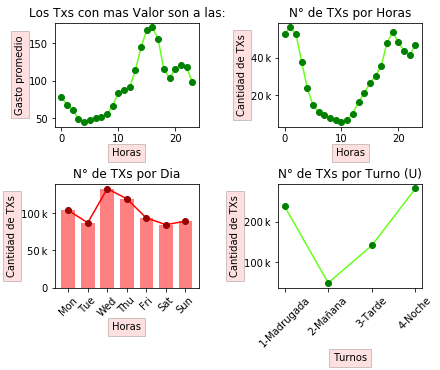

In [17]:
box = dict(facecolor='#ff6666', pad=4, alpha=0.2)
fig, axes = plt.subplots(2, 2)
ax1, ax2, ax3, ax4 = axes.flatten()
plt.subplots_adjust(top=1, bottom=0.08, left=0.10, right=0.95, hspace=0.55, wspace=0.55)

"""
y = list(data.groupby(['merchant_district']).sum()['amount_sol'])
x = list(data.groupby(['merchant_district']).sum()['amount_sol'] .index)
ax1.pie(y, labels=x, autopct='%1.1f%%', shadow=False, startangle=230)
ax1.axis('equal') 
"""
ax1.xaxis.set_major_formatter(formatter)
ax1.yaxis.set_major_formatter(formatter)
y = list(data.groupby(['hora']).mean()['amount_sol'])
y_max = list(data.groupby(['hora']).max()['amount_sol'])
x = range(len(y))
# ax1.plot(x,y_max,'-',color='#66ff1a')
ax1.plot(x,y,'-',color='#66ff1a')
ax1.plot(x,y,'ob',color='green')
ax1.set_title('Los Txs con mas Valor son a las:')
ax1.set_xlabel('Horas', bbox=box)
ax1.set_ylabel('Gasto promedio', bbox=box)


ax2.xaxis.set_major_formatter(formatter)
ax2.yaxis.set_major_formatter(formatter)
y = list(data.groupby(['hora']).count()['quantity'])
x = range(len(y))
ax2.plot(x,y,'-',color='#66ff1a')
ax2.plot(x,y,'ob',color='green')
ax2.set_title('N° de TXs por Horas')
ax2.set_xlabel('Horas', bbox=box)
ax2.set_ylabel('Cantidad de TXs', bbox=box)


y = data.groupby(['dia_semana']).count()['quantity']
x = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
ax3.yaxis.set_major_formatter(formatter)
ax3.set_xticklabels(x, rotation=45)
ax3.bar(x,y,0.7,color='#ff8080')
ax3.plot(x,y,'-',color='#ff0000')
ax3.plot(x,y,'ob',color='#990000')
ax3.set_title('N° de TXs por Dia')
ax3.set_xlabel('Horas', bbox=box)
ax3.set_ylabel('Cantidad de TXs', bbox=box)


y = list(data.groupby(['turno']).count()['quantity'])
x = list(data.groupby(['turno']).count()['quantity'] .index)
ax4.yaxis.set_major_formatter(formatter)
ax4.set_xticklabels(x, rotation=45)
ax4.plot(x,y,'-',color='#66ff1a')
ax4.plot(x,y,'ob',color='green')
ax4.set_title('N° de TXs por Turno (U)')
ax4.set_xlabel('Turnos', bbox=box)
ax4.set_ylabel('Cantidad de TXs', bbox=box)


plt.savefig("imagen.png",dpi = 1000)

In [18]:
data.head(3)
data.to_csv('./data/data.csv',index=False)